# Car rental dataset and EDA analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("CarRentalData.csv")

In [3]:
df.info(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   int64  
 10  rate.daily          5851 non-null   int64  
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 685.8+

In [4]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


In [5]:
df.isnull().sum()

fuelType               75
rating                501
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
dtype: int64

## Data  Cleaning

#### since location country has no use so we are deleting this column 

In [6]:
df.drop("location.country",axis=1,inplace=True)

In [7]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


#### location longitude and latitude is of no use we can also drop that column 

In [8]:
df.drop(['location.latitude','location.longitude'],axis = 1,inplace = True)

In [9]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,NM,3553565,47,Chrysler,Sebring,car,2010


#### so we have removed the  useless columns  naw we will remove null values

In [10]:
df.isnull().sum()

fuelType             75
rating              501
renterTripsTaken      0
reviewCount           0
location.city         0
location.state        0
owner.id              0
rate.daily            0
vehicle.make          0
vehicle.model         0
vehicle.type          0
vehicle.year          0
dtype: int64

#### fueltype and rating has null values so we are replacing rating null values with zero and fueltype nullvalues with "unknown"

In [11]:
df["rating"]=df["rating"].fillna(0.0)

In [12]:
df["fuelType"]=df["fuelType"].fillna("UNOKNOWN")

In [13]:
df.isnull().sum()

fuelType            0
rating              0
renterTripsTaken    0
reviewCount         0
location.city       0
location.state      0
owner.id            0
rate.daily          0
vehicle.make        0
vehicle.model       0
vehicle.type        0
vehicle.year        0
dtype: int64

###  null values has been removed

## UNIVARIATE ANALYSIS

### Which fueltype is most commonly used in vehicles ?

<AxesSubplot:xlabel='fuelType', ylabel='count'>

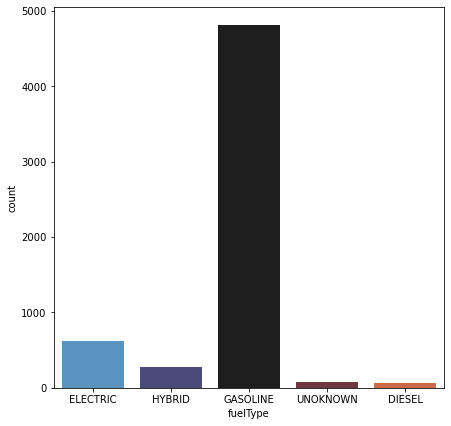

In [14]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['fuelType'], palette='icefire')

### here we will find the most rented model 

<AxesSubplot:xlabel='count', ylabel='vehicle.model'>

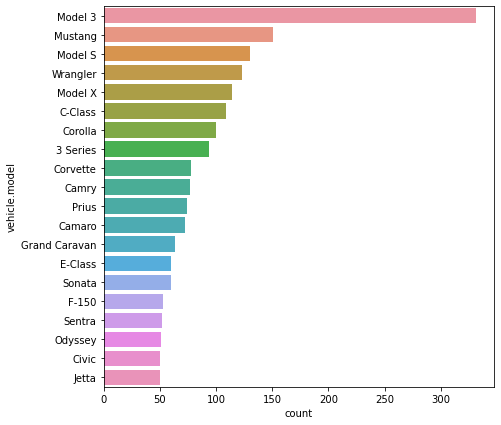

In [15]:
plt.figure(figsize=(7,7))
sns.countplot(y=df['vehicle.model'], order=df['vehicle.model'].value_counts().index[0:20])

### TOP 10  owners of the vhicles 

<AxesSubplot:xlabel='count', ylabel='owner.id'>

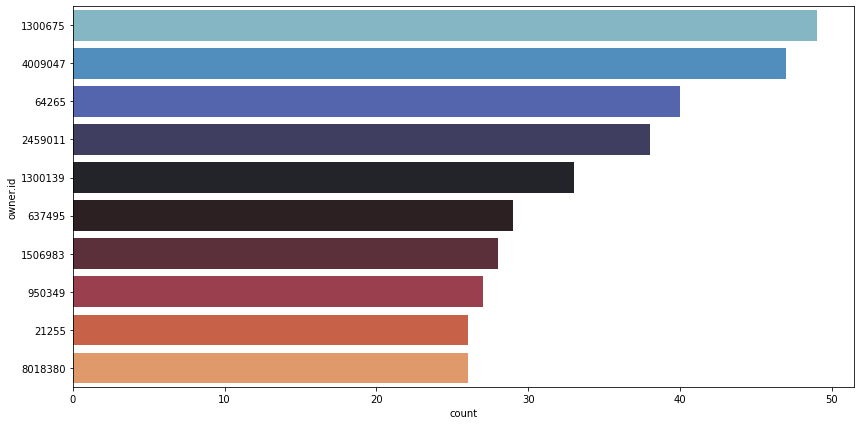

In [16]:
plt.figure(figsize=(14,7))
sns.countplot(y=df['owner.id'], order = df['owner.id'].value_counts().index[0:10],palette='icefire')

### which city is mostly  rents cars

<AxesSubplot:xlabel='location.city', ylabel='count'>

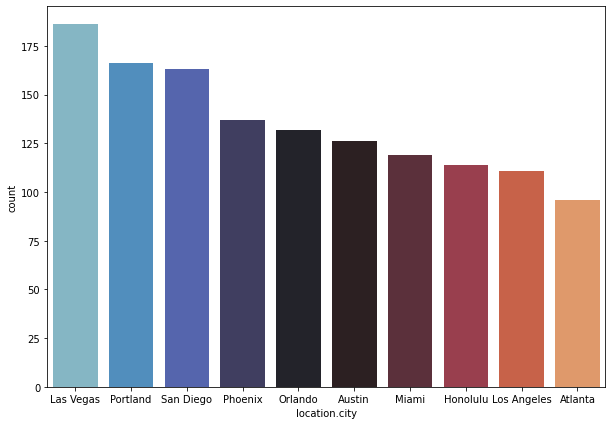

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['location.city'], order=df['location.city'].value_counts().index[0:10], palette='icefire')

### which is the most type of fuel and vehicle is used 

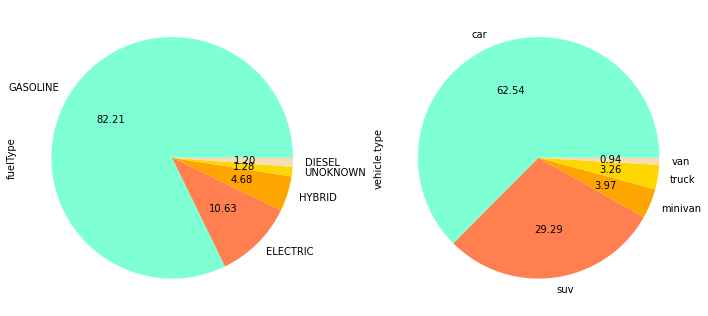

In [18]:
color = ['aquamarine','coral','orange','gold','wheat']
colunas = ['fuelType','vehicle.type']
plt.figure(figsize=(10,10))
for i, col in enumerate(colunas):
    axes = plt.subplot(2,2, i + 1)
    df[col].value_counts().plot.pie(autopct='%.2f',colors=color)   

plt.tight_layout()
plt.show()

### THE VEHICLE BRANDS MOSTLY RENTED BY THE CUSTOMERS 

<AxesSubplot:xlabel='count', ylabel='vehicle.make'>

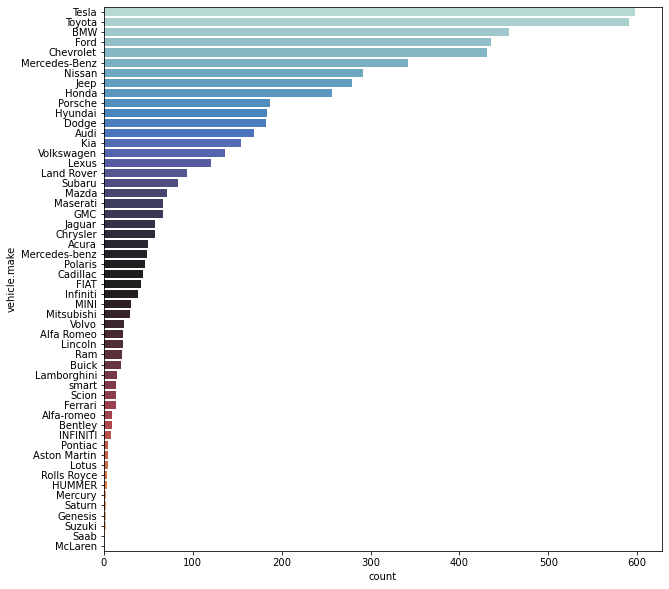

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['vehicle.make'], order=df['vehicle.make'].value_counts().index,palette='icefire')

# BIVARIATE AND MULTIVARIATE ANALYSIS OF GIVEN DATASET

 ## Now we have calculated that  tesla is the most rented brand so we can find in which state its demand is highest 

In [20]:
df["vehicle.type"].nunique() 

5

In [21]:
df1=df[df["vehicle.make"]=="Tesla"]

In [22]:
df2=df1.groupby(by="location.state").apply(lambda x:x)

In [23]:
df2.head(100)

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,NM,15621242,190,Tesla,Model X,suv,2018
22,ELECTRIC,5.00,3,1,Albuquerque,NM,1269071,171,Tesla,Model S,car,2015
39,ELECTRIC,4.83,8,6,Doraville,GA,53029,146,Tesla,Model 3,car,2020
49,ELECTRIC,5.00,15,11,Atlanta,GA,2253859,134,Tesla,Model 3,car,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1140,ELECTRIC,5.00,3,3,Denver,CO,3983880,79,Tesla,Model 3,car,2020
1173,ELECTRIC,5.00,13,11,Broomfield,CO,2379219,149,Tesla,Model 3,car,2019
1180,ELECTRIC,4.98,67,64,Boulder,CO,1419065,119,Tesla,Model 3,car,2018
1185,ELECTRIC,5.00,23,21,Boulder,CO,5707398,199,Tesla,Model X,suv,2017


C:\Users\ANKIT PANDEY\.atom\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


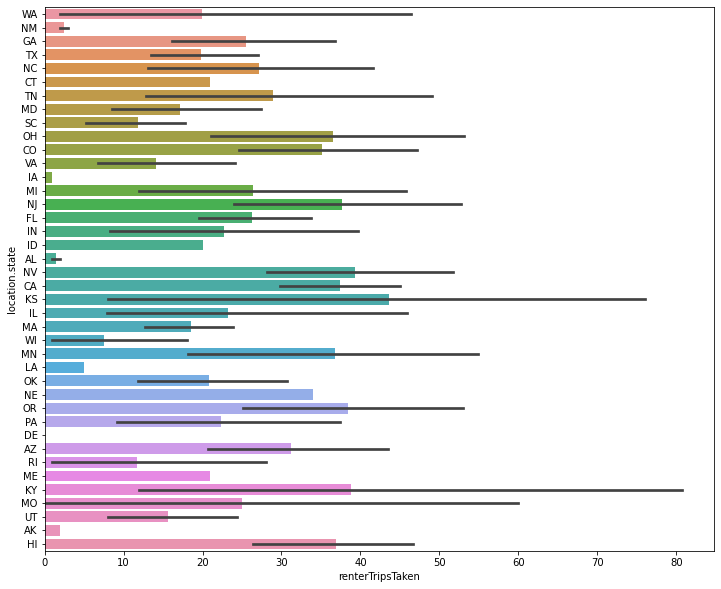

In [24]:
plt.figure(figsize=[12,10])
sns.barplot("renterTripsTaken","location.state", data=df2  )
plt.show()

### Similarly we can find for  toyota brand that in which state we can get maximum demand

In [25]:
df3=df[df["vehicle.make"]=="Toyota"]

In [26]:
df4=df3.groupby(by="location.state").apply(lambda x:x)

In [27]:
df4.head(100)

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
2,HYBRID,4.92,28,24,Albuquerque,NM,10199256,35,Toyota,Prius,car,2012
11,HYBRID,4.70,11,10,Albuquerque,NM,10199256,35,Toyota,Prius,car,2012
13,HYBRID,4.92,51,38,Albuquerque,NM,3070318,42,Toyota,Avalon Hybrid,car,2013
30,GASOLINE,5.00,3,3,Evans,GA,7697716,112,Toyota,Sequoia,suv,2016
125,GASOLINE,4.74,28,23,Atlanta,GA,10250575,49,Toyota,Corolla,car,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
848,GASOLINE,4.94,39,35,Colorado Springs,CO,8231060,33,Toyota,Corolla,car,2009
858,GASOLINE,5.00,10,9,Colorado Springs,CO,10889285,50,Toyota,Sienna,minivan,2011
862,GASOLINE,5.00,9,8,Colorado Springs,CO,15033739,70,Toyota,Tacoma,truck,2020
863,GASOLINE,5.00,18,15,Colorado Springs,CO,10889285,34,Toyota,Camry Hybrid,car,2009


C:\Users\ANKIT PANDEY\.atom\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


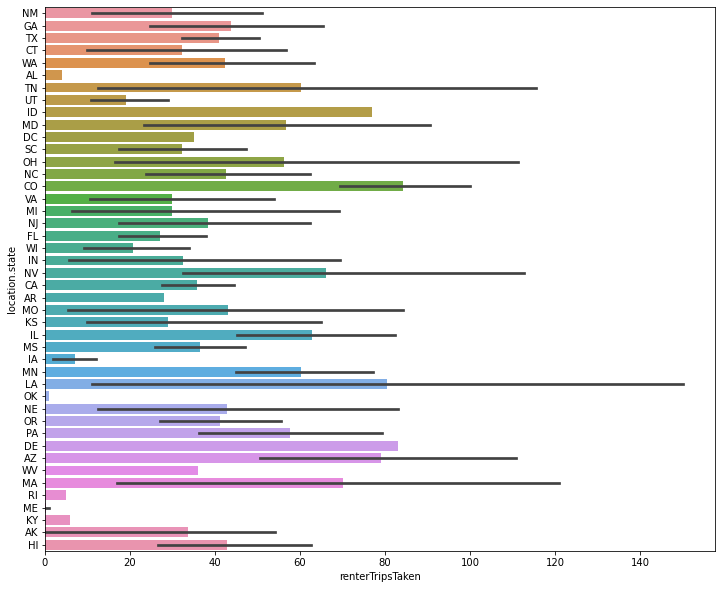

In [28]:
plt.figure(figsize=[12,10])
sns.barplot("renterTripsTaken","location.state", data=df4  )
plt.show()

###  WE CAN GET WHICH VEHICLE TYPE AMONG CAR OR SUV IS USED MAXIMUM IN WHICH STATE

C:\Users\ANKIT PANDEY\.atom\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location.state', ylabel='count'>

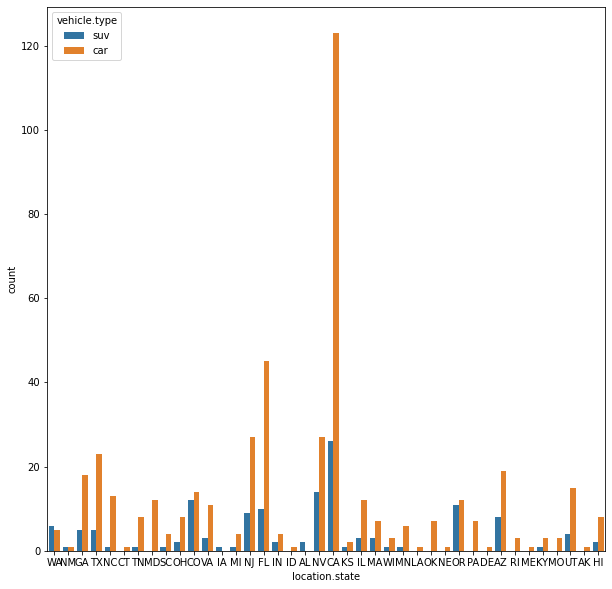

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(df2["location.state"] , data=df2 , hue="vehicle.type")

C:\Users\ANKIT PANDEY\.atom\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Toyota'),
  Text(2, 0, 'Ford'),
  Text(3, 0, 'Chrysler'),
  Text(4, 0, 'Mercedes-Benz'),
  Text(5, 0, 'GMC'),
  Text(6, 0, 'Volkswagen'),
  Text(7, 0, 'Saab'),
  Text(8, 0, 'Ram'),
  Text(9, 0, 'Jeep'),
  Text(10, 0, 'Porsche'),
  Text(11, 0, 'Nissan'),
  Text(12, 0, 'Dodge'),
  Text(13, 0, 'Hyundai'),
  Text(14, 0, 'Chevrolet'),
  Text(15, 0, 'Lexus'),
  Text(16, 0, 'Cadillac'),
  Text(17, 0, 'smart'),
  Text(18, 0, 'Land Rover'),
  Text(19, 0, 'BMW'),
  Text(20, 0, 'Mercedes-benz'),
  Text(21, 0, 'Acura'),
  Text(22, 0, 'Audi'),
  Text(23, 0, 'Jaguar'),
  Text(24, 0, 'Maserati'),
  Text(25, 0, 'INFINITI'),
  Text(26, 0, 'Infiniti'),
  Text(27, 0, 'Mazda'),
  Text(28, 0, 'Bentley'),
  Text(29, 0, 'Mitsu

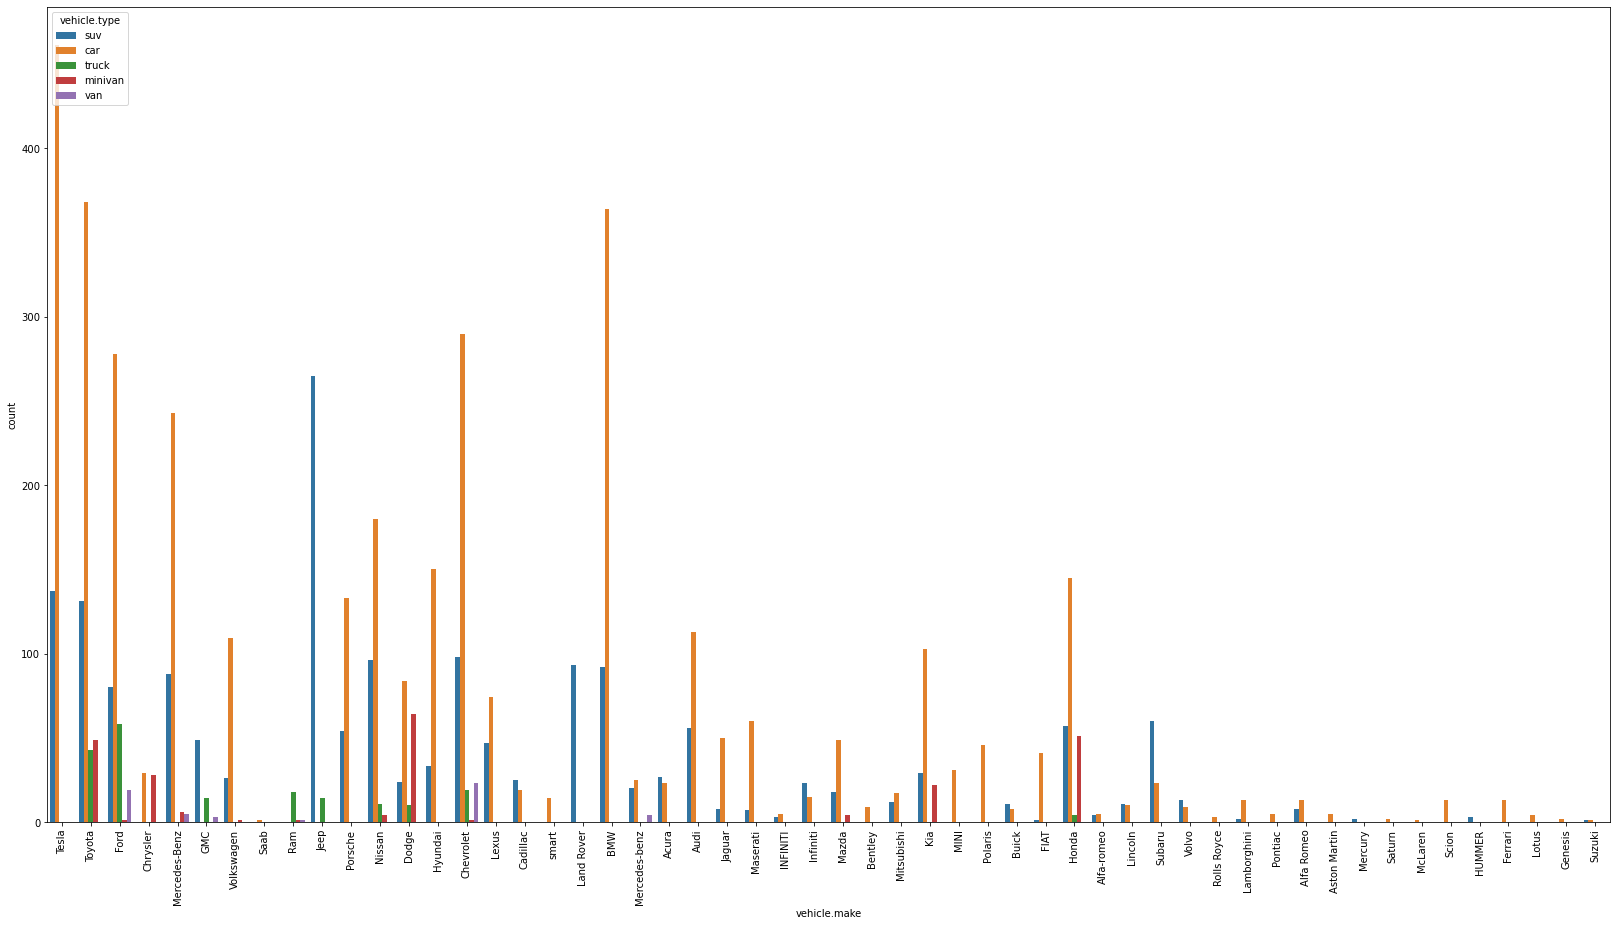

In [30]:
plt.figure(figsize=(28,15))
sns.countplot(df["vehicle.make"] , data=df , hue="vehicle.type")
plt.xticks(rotation=90)

### review count vs rentertrips taken 

<AxesSubplot:xlabel='reviewCount', ylabel='renterTripsTaken'>

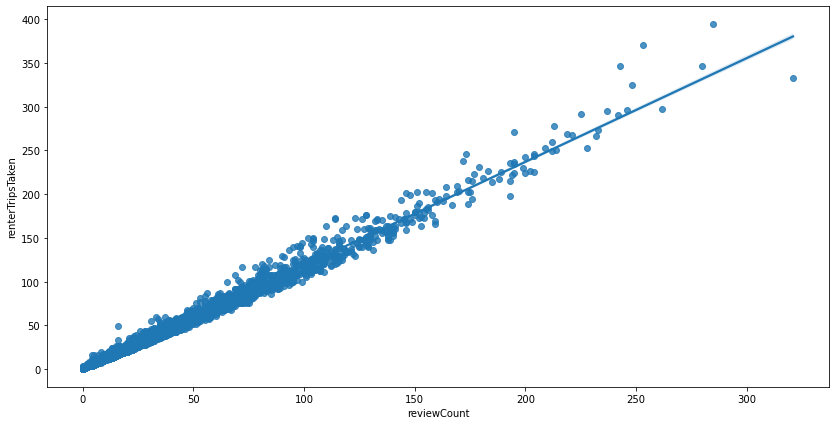

In [31]:
plt.figure(figsize=(14,7))
sns.regplot(x=df['reviewCount'], y=df['renterTripsTaken'])

### the  graph shoes that car type of vehicle which has went on the trips maximum  number of times

<AxesSubplot:xlabel='vehicle.type'>

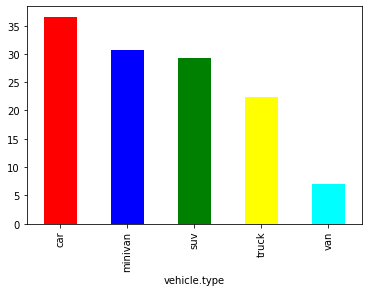

In [32]:
df.groupby('vehicle.type')['renterTripsTaken'].mean().plot.bar(color=['Red' , 'Blue' , 'Green' , 'Yellow' , 'Cyan' ])

#### rent trips per daily rates

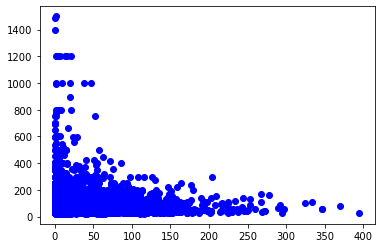

In [33]:
plt.scatter(x=df["renterTripsTaken"],y=df["rate.daily"],color="blue") 
plt.show()

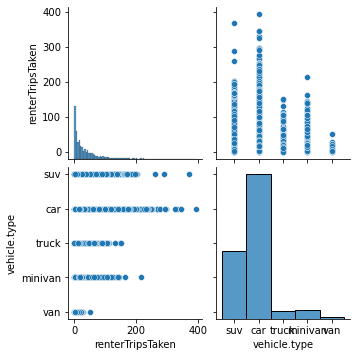

In [34]:
sns.pairplot(data=df,vars=["renterTripsTaken","vehicle.type"])
plt.show()

<AxesSubplot:xlabel='fuelType'>

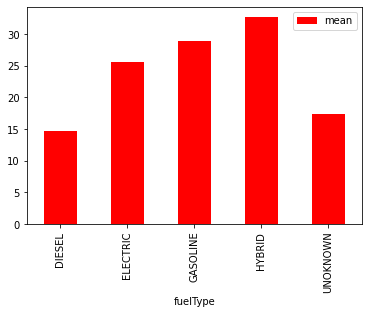

In [35]:
df.groupby('fuelType')['reviewCount'].aggregate(['mean']).plot.bar(color = 'Red')

###daily rates per brand

<AxesSubplot:xlabel='rate.daily', ylabel='vehicle.make'>

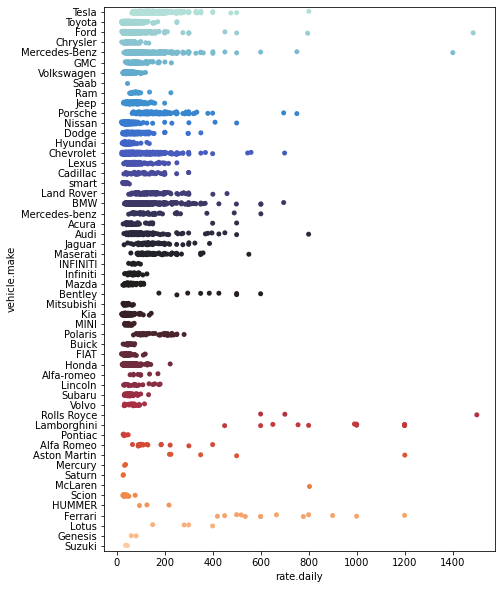

In [36]:
plt.figure(figsize=(7,10))
sns.stripplot(y=df['vehicle.make'], x=df['rate.daily'], palette='icefire')

## Statistical Analysis

In [37]:
print('maximum value of daily rates:',df['rate.daily'].max())
print('Minimum value of daily rates:',df['rate.daily'].min())
print('mean of daily rates',df['rate.daily'].mean())
print('median of daily rate ',df['rate.daily'].median())
print('stdandard deviation',df['rate.daily'].std())

maximum value of daily rates: 1500
Minimum value of daily rates: 20
mean of daily rates 93.691505725517
median of daily rate  69.0
stdandard deviation 96.0809204605828


In [38]:
#Statistical analysis shows the maximumvalue is 1500 
#minimum value  of daily rates is 20 

<AxesSubplot:>

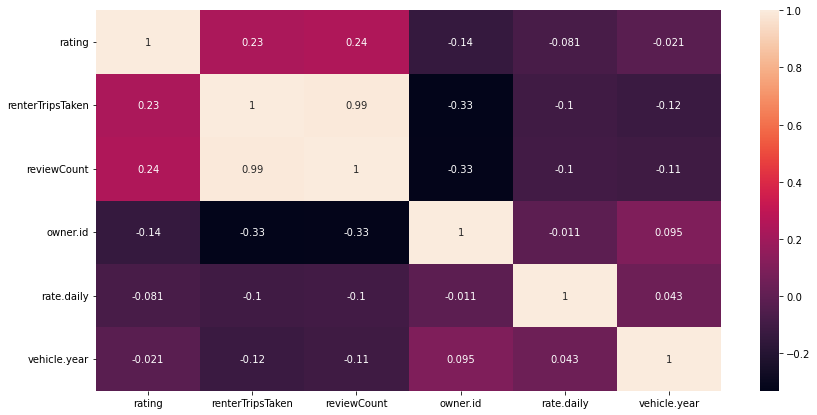

In [39]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

###  This graph shows the correlation between various culumns 


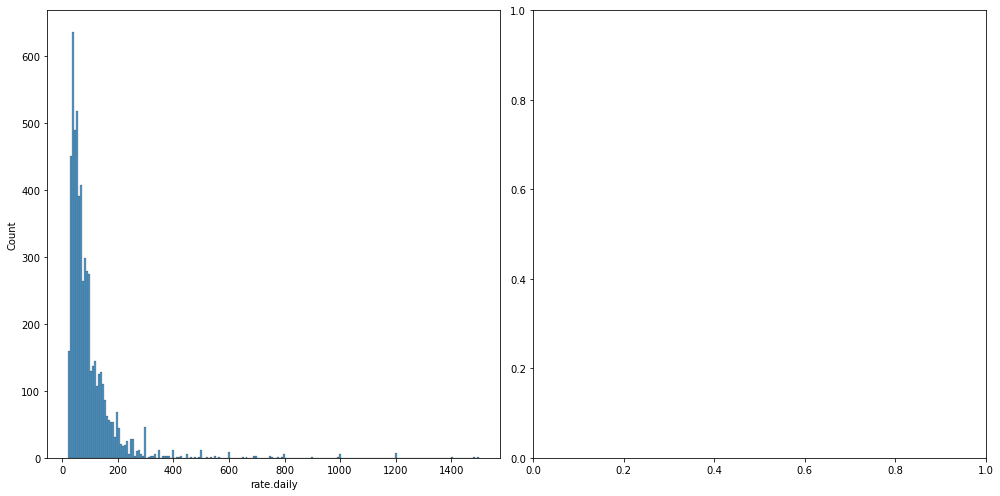

In [40]:
fig, axes = plt.subplots(1,2, figsize=(14,7))
sns.histplot(x=df['rate.daily'], ax=axes[0])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='rate.daily'>

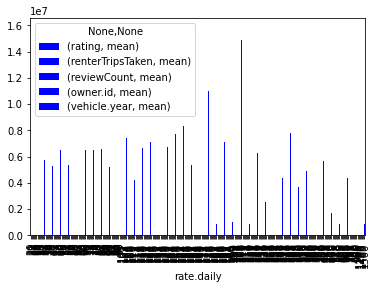

In [41]:
df.groupby('rate.daily').aggregate(['mean']).plot.bar(color = 'blue')

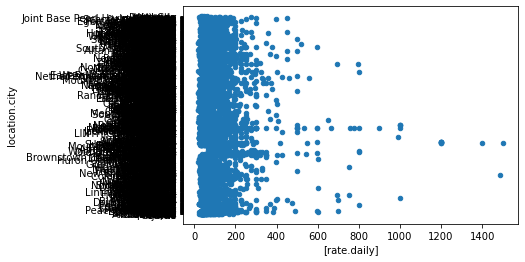

In [42]:
df.plot.scatter(x=["rate.daily"],y="location.city")
plt.show()